In [1]:
# Required libraries
import numpy as np
import pandas as pd


In [2]:
# Import training set
df = pd.read_csv('inclassfakejobs/train.csv')


In [3]:
df.head()


,Id,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,required_doughnuts_comsumption,fraudulent
0,0,5737,Jr. Business Analyst & Quality Analyst (entry...,"US, NJ, PISCATAWAY",NaN,NaN,NaN,"Duration: Full time / W2Location: Piscataway,N...",What we require:-- Masters degree in Computers...,NaN,0,0,0,Full-time,Entry level,Master's Degree,Financial Services,Finance,-0.410911,0
1,1,7107,English Teacher Abroad,"US, PA, Scranton",NaN,NaN,We help teachers get safe &amp; secure jobs ab...,"Play with kids, get paid for it Love travel? J...",University degree required. TEFL / TESOL / CEL...,See job description,0,1,1,Contract,NaN,Bachelor's Degree,Education Management,NaN,-0.163785,0
2,2,11979,SQL Server Database Developer Job opportunity ...,"US, IL, Barrington",NaN,90000-100000,We are an innovative personnel-sourcing firm w...,Position : SQL Server Database DeveloperJob Lo...,Position : SQL Server Database DeveloperJob Lo...,Benefits - FullBonus Eligible - Yes,0,0,0,Full-time,Mid-Senior level,Bachelor's Degree,Information Technology and Services,Information Technology,-0.244369,0
3,3,9375,Legal Analyst - 12 Month FTC,"GB, LND, London",Legal,NaN,MarketInvoice is one of the most high-profile ...,DescriptionOur mission at MarketInvoice is to ...,Duties and ResponsibilitiesReviewing contractu...,Competitive salaryPrivate HealthcareHalf price...,0,1,0,Full-time,Associate,Professional,Financial Services,Legal,-0.456807,0
4,4,1301,Part-Time Finance Assistant,"GB, LND,",NaN,NaN,NaN,Salary:£9 - £10 per hour We are currently goin...,"Your role will be a varied, interesting and in...",Salary:£9 - £10 per hour,0,0,0,Part-time,NaN,NaN,Accounting,NaN,-0.217880,0


In [4]:
df.columns


Index(['Id', 'job_id', 'title', 'location', 'department', 'salary_range',
       'company_profile', 'description', 'requirements', 'benefits',
       'telecommuting', 'has_company_logo', 'has_questions', 'employment_type',
       'required_experience', 'required_education', 'industry', 'function',
       'required_doughnuts_comsumption', 'fraudulent'],
      dtype='object')

In [5]:
df_string = df[['title', 'company_profile', 'description',
                'requirements', 'benefits', 'fraudulent']]
df_string.head()


,title,company_profile,description,requirements,benefits,fraudulent
0,Jr. Business Analyst & Quality Analyst (entry...,NaN,"Duration: Full time / W2Location: Piscataway,N...",What we require:-- Masters degree in Computers...,NaN,0
1,English Teacher Abroad,We help teachers get safe &amp; secure jobs ab...,"Play with kids, get paid for it Love travel? J...",University degree required. TEFL / TESOL / CEL...,See job description,0
2,SQL Server Database Developer Job opportunity ...,We are an innovative personnel-sourcing firm w...,Position : SQL Server Database DeveloperJob Lo...,Position : SQL Server Database DeveloperJob Lo...,Benefits - FullBonus Eligible - Yes,0
3,Legal Analyst - 12 Month FTC,MarketInvoice is one of the most high-profile ...,DescriptionOur mission at MarketInvoice is to ...,Duties and ResponsibilitiesReviewing contractu...,Competitive salaryPrivate HealthcareHalf price...,0
4,Part-Time Finance Assistant,NaN,Salary:£9 - £10 per hour We are currently goin...,"Your role will be a varied, interesting and in...",Salary:£9 - £10 per hour,0


Eliminate missing values

In [6]:
for col in ['title', 'company_profile', 'description', 'requirements', 'benefits']:
    missing = df_string[df_string[f'{col}'].isna()].shape[0]
    print(f'{col}: {missing}')


title: 0
company_profile: 1962
description: 1
requirements: 1629
benefits: 4368


In [7]:
df_string = df_string.fillna('')
for col in df_string.columns:
    missing = df_string[df_string[f'{col}'].isna()].shape[0]
    print(f'{col}: {missing}')


title: 0
company_profile: 0
description: 0
requirements: 0
benefits: 0
fraudulent: 0


Now to add features for string length

In [8]:
for col in df_string.columns[:-1]:
    string_len = []
    for i, string in enumerate(df_string[col].values):
        string_len.append(len(str(string)))
    df_string[f'{col}#'] = string_len


In [9]:
df_string.head(1)


,title,company_profile,description,requirements,benefits,fraudulent,title#,company_profile#,description#,requirements#,benefits#
0,Jr. Business Analyst & Quality Analyst (entry...,,"Duration: Full time / W2Location: Piscataway,N...",What we require:-- Masters degree in Computers...,,0,53,0,1062,224,0


Plot findings

In [10]:
import matplotlib.pyplot as plt


In [11]:
# Split data by fraudulent/nonfraudulent
df0 = df_string[df_string['fraudulent'] == 0]
df1 = df_string[df_string['fraudulent'] == 1]


In [15]:
def dist_plots(df0, df1, col):

    fig, ax = plt.subplots(1, 2, figsize=(14, 4))

    dist0 = scaler(df0[col]).values
    dist1 = scaler(df1[col]).values
    # We can set the number of bins with the *bins* keyword argument.
    ax[0].hist(dist0, bins=100)
    ax[0].set_xlim([min(dist0), max(dist0)])
    ax[1].hist(dist1, bins=100, color='orange')
    ax[1].set_xlim([min(dist0), max(dist0)])

    plt.show()


In [16]:
def scaler(col):
    mean = np.mean(col.values)
    std = np.std(col.values)
    col = (col-mean)/std
    return col


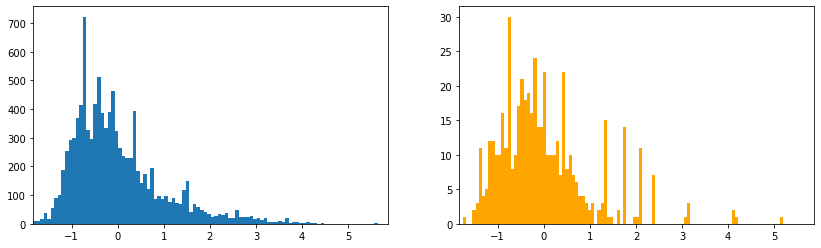

In [17]:
dist_plots(df0, df1, 'title#')


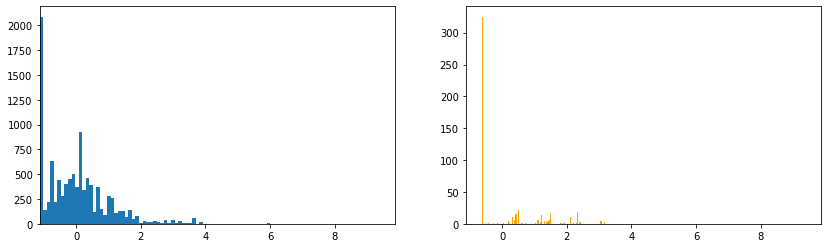

In [18]:
dist_plots(df0, df1, 'company_profile#')


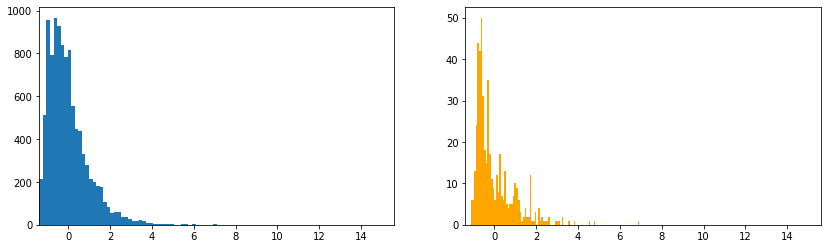

In [19]:
dist_plots(df0, df1, 'description#')


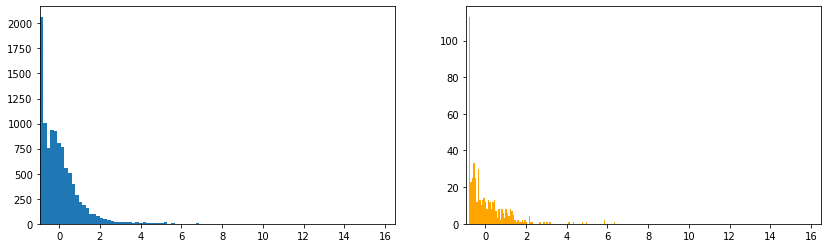

In [20]:
dist_plots(df0, df1, 'requirements#')


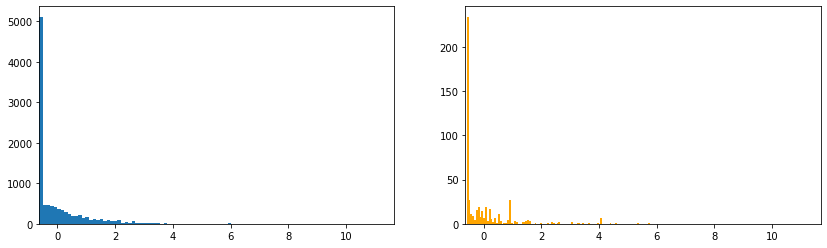

In [21]:
dist_plots(df0, df1, 'benefits#')


In [22]:
df_string_train = df_string[[
    'title#', 'company_profile#', 'description#', 'requirements#', 'benefits#']]
for col in df_string_train.columns:
    df_string_train[col] = scaler(df_string_train[col])


C:\Users\pl3os\AppData\Local\Temp/ipykernel_6792/752545217.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_string_train[col] = scaler(df_string_train[col])


<AxesSubplot:>

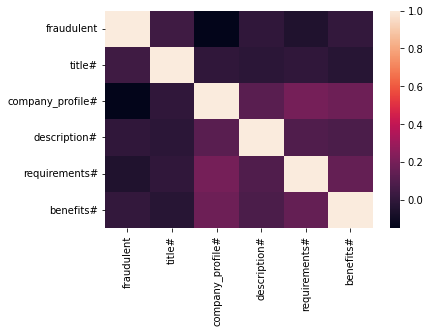

In [23]:
import seaborn as sns

df_num = df_string.drop(['title', 'company_profile',
                        'description', 'requirements', 'benefits'], axis=1)
sns.heatmap(df_num.corr())


In [24]:
df_num.corr()


,fraudulent,title#,company_profile#,description#,requirements#,benefits#
fraudulent,1.000000,0.038281,-0.150589,-0.002633,-0.053315,0.006261
title#,0.038281,1.000000,-0.006266,-0.018741,-0.004759,-0.030186
company_profile#,-0.150589,-0.006266,1.000000,0.116309,0.193000,0.168658
description#,-0.002633,-0.018741,0.116309,1.000000,0.088753,0.076724
requirements#,-0.053315,-0.004759,0.193000,0.088753,1.000000,0.150469
benefits#,0.006261,-0.030186,0.168658,0.076724,0.150469,1.000000


Preprocess only the features with large non-zero correlation scores with the fraudulent feature.

In [25]:
# Preprocessing Data
df_train = df_num.drop(['fraudulent'], axis=1)
for col in df_train.columns:
    df_train[col] = scaler(df_train[col])
df_train.head()


,title#,company_profile#,description#,requirements#,benefits#
0,1.745109,-1.102219,-0.176980,-0.594759,-0.623779
1,-0.402323,-1.007750,-0.944313,-0.746242,-0.566310
2,2.460920,0.133015,0.908103,2.307579,-0.517914
3,-0.044418,0.134798,1.180782,0.341531,-0.040010
4,-0.115999,-1.102219,-0.918397,0.415661,-0.548161


In [26]:
df_test = pd.read_csv('inclassfakejobs/test.csv')
df_test = df_test[['title', 'company_profile',
                   'description', 'requirements', 'benefits']]
columns = df_test.columns
df_test = df_test.fillna('')
for col in columns:
    string_len = []
    for i, string in enumerate(df_test[col].values):
        string_len.append(len(str(string)))
    df_test[f'{col}#'] = string_len
    df_test[f'{col}#'] = scaler(df_test[f'{col}#'])
df_test = df_test.drop(columns, axis=1)
df_test.head()


,title#,company_profile#,description#,requirements#,benefits#
0,0.554323,-1.082840,-0.858389,-0.705602,-0.383558
1,-0.028791,0.284813,0.516297,-0.584327,0.121507
2,-0.903461,0.664427,-0.134056,-0.647456,-0.614445
3,-0.174569,0.102806,-0.416723,-0.197244,-0.614445
4,0.189877,-0.086135,-1.157618,-0.454745,-0.614445


In [27]:
df_train.to_csv('peter_train1.csv')
df_test.to_csv('peter_test1.csv')
